---
## Task 1:
A- Load the provided CSV dataset (sample-superstore.csv) into Python and print the first ten records with the associated column names.

B- Provide a short paragraph to describe your understanding of the dataset. (around 100 words)

### Task 1 - Part A: Load and Explore the Dataset
In this task, we’ll use the Pandas library to load the sample-superstore.csv dataset and define two reusable methods:
- head(limit) – Returns the top N rows of the dataset.
- tail(limit) – Returns the bottom N rows of the dataset.

These methods take a parameter limit that specifies how many rows to return.

---

In [15]:
import pandas as pd
from pandas import DataFrame

class ExploratoryDataAnalysis:
    ## Class-level variables
    store_data_frame: DataFrame = None
    
    def __init__(self, path: str):
        self.store_data_frame = pd.read_csv(path, sep=',')

    def head(self, limit: int):
        return self.store_data_frame.head(limit)

    def tail(self, limit: int):
        return self.store_data_frame.tail(limit)

if __name__ == '__main__':
    exp_data_analysis = ExploratoryDataAnalysis('sample-superstore.csv')
    ## printing first 10 records associated with column names
    print(exp_data_analysis.head(10).to_markdown())

|    |   Row ID | Order ID       | Order Date   | Ship Date   | Ship Mode      | Customer ID   | Customer Name    | Segment     | Country       | City         | State          | Postal Code   | Region   | Product ID      | Category        | Sub-Category   | Product Name                                                                |    Sales | Quantity   |   Discount | Profit       |
|---:|---------:|:---------------|:-------------|:------------|:---------------|:--------------|:-----------------|:------------|:--------------|:-------------|:---------------|:--------------|:---------|:----------------|:----------------|:---------------|:----------------------------------------------------------------------------|---------:|:-----------|-----------:|:-------------|
|  0 |     7773 | CA-2016-108196 | 25/11/2016   | 12/02/2016  | Standard Class | CS-12505      | Cindy Stewart    | Consumer    | United States | Lancaster    | Ohio           | 43130         | Est      | TEC-MA-10000418 | T

---

### Task 1 Part B - Understanding the Sample Superstore Dataset

The Sample Superstore dataset captures detailed retail sales data from a fictional store. It includes information about customer orders such as 
- `Order ID`
- `Order Date`
- `Ship Mode`
- `Customer Name`
- `Segment`
- `City`
- `State`
- `Region`

Each transaction is linked to a product with,
- `Product ID`
- `Category`
- `Sub-Category`
- `Product Name`

Each transaction contains metrics such as 
- `sales`
- `Quantity`
- `Discount`
- `Profit`

This dataset is ideal for analysing customer purchasing behaviour, shipping performance, product profitability, and regional sales trends. It can be used in data science for performing exploratory data analysis (EDA), creating dashboards, and building predictive business models.

### Loading Data
To work with this data in Python, we use the Pandas library, which provides powerful tools for data manipulation and analysis. We load the dataset using `pd.read_csv()`, which reads the CSV file and returns a `DataFrame`. A DataFrame is a two-dimensional labelled data structure in Pandas, similar to a table in a database or an Excel spreadsheet. It allows us to easily inspect, filter, sort, and transform the data. Once loaded, the dataset becomes a DataFrame object where each row represents a single order and each column represents a different attribute related to the order.

---

## Task 2:
Process the dataset's variables and conduct exploratory data analysis. Explore the dataset thoroughly, and feel free to improvise as needed. However, you must use Python for at least four of the following techniques:

- Descriptive statistics: Describe features of the data set by generating summaries about data samples.
- Outlier treatment: Identify abnormal or problematic values and apply methods to treat them.
- Normalising and scaling (numerical variables): Apply normalisation and scaling methods to transform data for further analysis.
- Grouping of data: Demonstrate data aggregations or frequency distributions to summarise analysis.
- Handling missing values in the dataset: Identify methods for cleaning the dataset.
- Correlation: Describe features that are related and the nature of that relationship.
- Univariate analysis and visualisation: Use different visualisation methods for demonstrating your analysis scenarios.

---

Shape of Dataset:  (9994, 21)

Column Names:  ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

Data types and non-null counts: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9993 non-null   object 
 2   Order Date     9992 non-null   object 
 3   Ship Date      9991 non-null   object 
 4   Ship Mode      9990 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9991 non-null   object 
 7   Segment        9991 non-null   object 
 8   Country        9990 non-null   object 
 9   City           9992 non-null   object 
 10  State          9990 

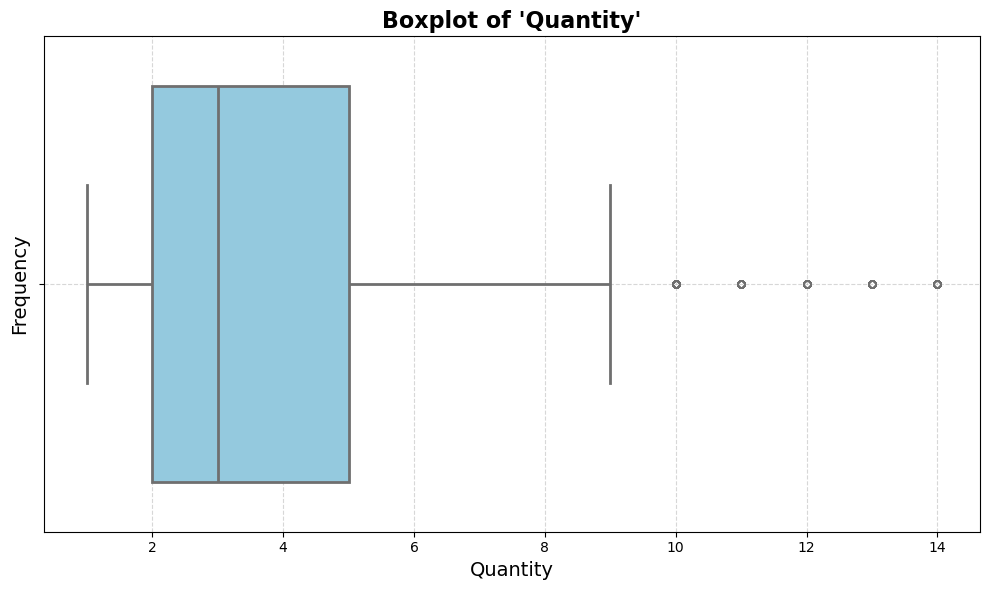

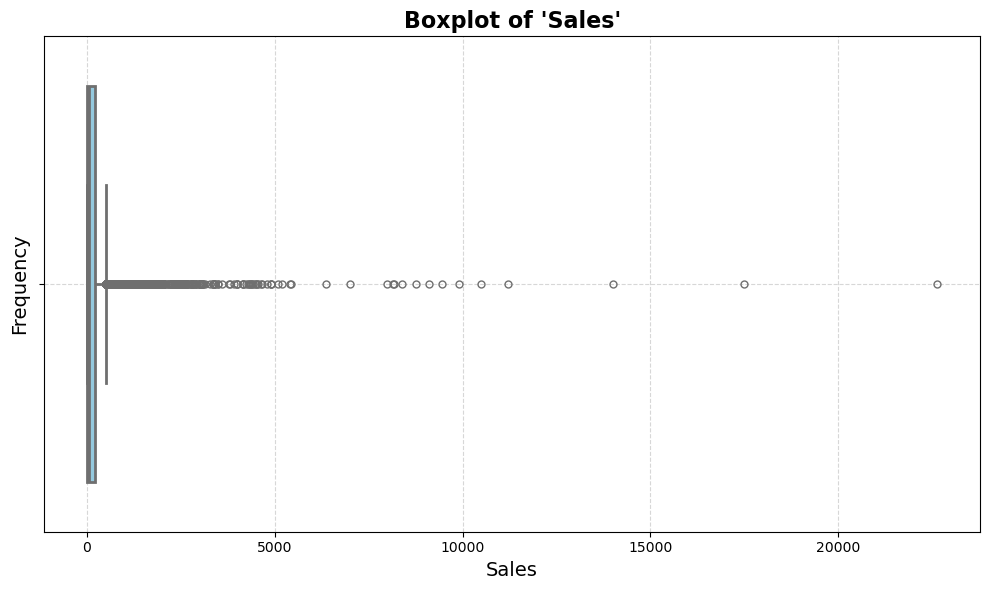


Quantity: Detected [-2.5, 9.5] bounds using IQR.

Sales: Detected [-266.711, 489.585] bounds using IQR.

Plotting quantity and sales after treating with outliers


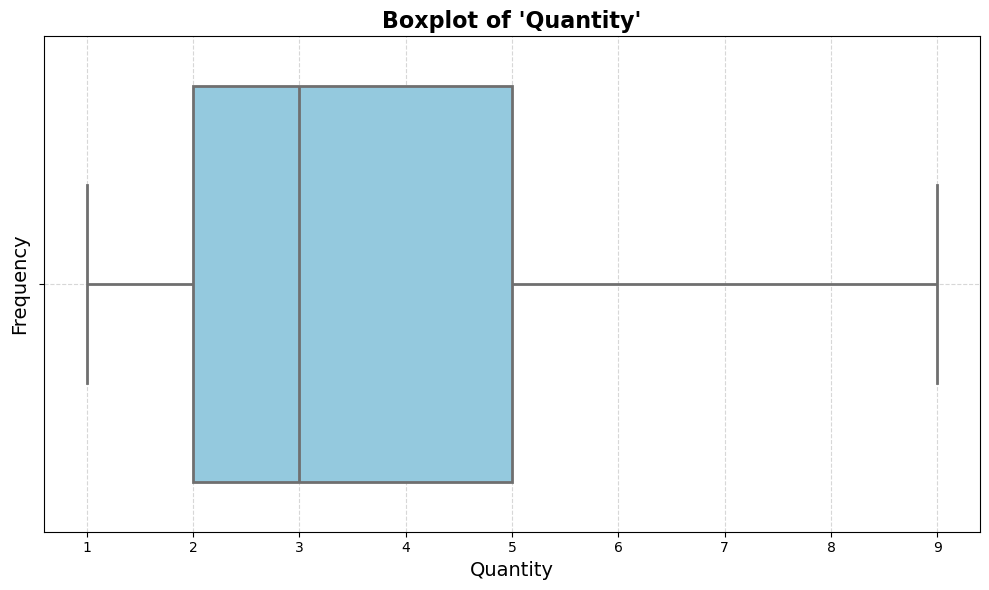

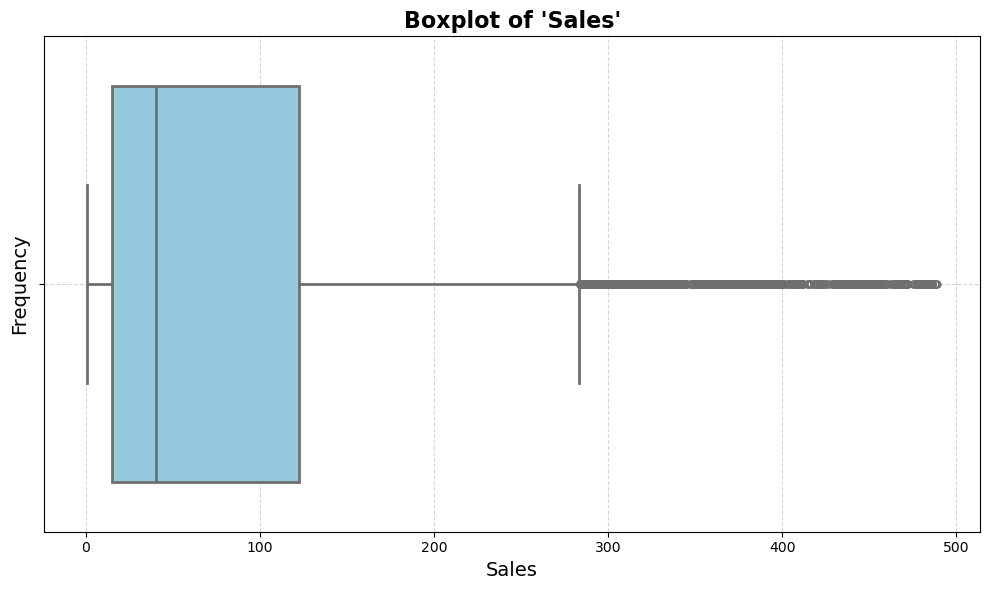

In [19]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from enum import Enum

class OutlierRemovalMethods(Enum):
    REMOVE = 1
    CAP = 2

class ColumnTypeConversionFailureException(Exception):
    def __init__(self, message):
        super().__init__(message)
    
class ColumnNotFoundError(Exception):
    def __init__(self, missing_columns):
        message = f"The following column(s) are missing: {missing_columns}"
        super().__init__(message)
        self.missing_columns = missing_columns

class ExploratoryDataAnalysis:
    ## Class-level variables
    store_data_frame: DataFrame = None
    
    def __init__(self, path: str):
        self.store_data_frame = pd.read_csv(path, sep=',')

    def inspect(self):
        """
        This method will provide inspection for the store data frame.
        """
        print("Shape of Dataset: ", self.store_data_frame.shape)
        print("\nColumn Names: ", self.store_data_frame.columns.tolist())

    def descriptive_stats(self):
        """
        This method will provide descriptive statistics for the store data frame.
        """
        print("\nDescriptive Statistics: ", self.store_data_frame.describe())

    def basic_info(self):
        """
        This method will provide basic information for the store data frame.
        """
        print("\nData types and non-null counts: ")
        print(self.store_data_frame.info())

    def missing_value_info(self):
        """
        This method will provide missing value information for the store data frame.
        """
        print("\nMissing values in each column: ")
        print(self.store_data_frame.isnull().sum())

    def get_categorical_candidates(self, threshold=10):
        """
        Return columns that have unique values less than or equal to `threshold`.
        These are good candidates for categorical analysis.
        """
        candidate_columns = []
        
        print(f"\nColumns with ≤ {threshold} unique values (possible categorical features):\n")
        for col in self.store_data_frame.columns:
            unique_values = self.store_data_frame[col].nunique()
            if unique_values <= threshold:
                candidate_columns.append((col, unique_values))

        return [col for col, _ in candidate_columns]

    def fill_missing_values(self, categorical_columns, fill_value):
        """
        This method will fill all missing values for categorical columns with the provided fill_value.
        """
        missing = [col for col in categorical_columns if col not in self.store_data_frame.columns]
        if missing:
            raise ColumnNotFoundError(missing)
            
        print(f"\nFilling up missing values in categorical columns with value '{fill_value}'")
        for col in categorical_columns:
            self.store_data_frame[col] = self.store_data_frame[col].fillna(fill_value)

    def print_uniques(self, columns = None):
        """
        This method is used to print unique values of the provided columns.
        """
        missing = [col for col in categorical_columns if col not in self.store_data_frame.columns]
        if missing:
            raise ColumnNotFoundError(missing)
         
        print("\n")   
        if columns:
            for col in columns:
                print(f"Column {col} have values {self.store_data_frame[col].unique()}.")
        else:
            print(self.store_data_frame.head(5))

    def replace_values(self, column, currVal, newVal):
        """
        This method is used to replace the current value of the column with the provided new value.
        """
        if column not in self.store_data_frame.columns:
            raise ColumnNotFoundError(column)

        print("\n") 
        ## Count how many current values will be replaced
        count_before = (self.store_data_frame[column] == currVal).sum()
        ## Perform Replacement
        self.store_data_frame[column] = self.store_data_frame[column].replace(currVal, newVal)
        ## Count how many new values being replaced
        count_after = (self.store_data_frame[column] == newVal).sum()

        print(f"Replaced {count_before} occurrence(s) of '{currVal}' with '{newVal}' in column '{column}'.")
        print(f"Total now: {count_after} instance(s) of '{newVal}' in '{column}'.")

    def convert_columns_dtype(self, dtype_map):
        """
        Convert specified columns to desired data types.

        Parameters:
        - dtype_map (dict): A dictionary where keys are column names and values are target data types.
                        Example: {'Segment': 'category', 'Sales': 'float'}
        """
        print("\n")
        for col, dtype in dtype_map.items():
            if col not in self.store_data_frame.columns:
                raise ColumnNotFoundError(col)
            try:
                self.store_data_frame[col] = (self.store_data_frame[col].astype(str).str.replace('"', '', regex=False).str.strip())
                self.store_data_frame[col] = self.store_data_frame[col].astype(dtype)
                print(f"Column {col} type is converted to {dtype}")
            except Exception as ex:
                error_message = f"Failed to convert column '{col}' to '{dtype}': {str(ex)}"
                raise ColumnTypeConversionFailureException(error_message)

    def group_and_summarize(self, group_by_col, agg_cols, sort_by=None, ascending=False):
        """
        Groups a DataFrame by one or more columns and summarises given numeric columns.

        Parameters:
            df (DataFrame): The input DataFrame.
            group_by_col (str or list): Column(s) to group by.
            agg_cols (str or list): Column(s) to aggregate (e.g., 'Sales', 'Profit').
            sort_by (str): Column to sort the result by (must be in agg_cols).
            ascending (bool): Sort order. The default is descending.

        Returns:
            DataFrame: Grouped and aggregated DataFrame.
        """
        if isinstance(agg_cols, str):
            agg_cols = [agg_cols]

        result = self.store_data_frame.groupby(group_by_col, observed=False)[agg_cols].sum()
        if sort_by:
            result = result.sort_values(by=sort_by, ascending=ascending)
        return result

    def plot_boxplot(self, column):
        """
        Plot a styled boxplot for the specified column.
        """
        if column not in self.store_data_frame.columns:
            raise ColumnNotFoundError(f"Column '{column}' not found in DataFrame.")

        plt.figure(figsize=(10, 6))
        sns.boxplot(
            x=self.store_data_frame[column],
            color="skyblue",
            linewidth=2,
            fliersize=5  # size of outlier points
        )
        plt.title(f"Boxplot of '{column}'", fontsize=16, fontweight='bold')
        plt.xlabel(column, fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    def treat_outliers(self, columns, method=OutlierRemovalMethods.REMOVE):
        """
        Detect and treat outliers using IQR method.
    
        Parameters:
        columns (str): Columns to process
        method (OutlierRemovalMethods): REMOVE to drop outliers, CAP to clip to IQR bounds
        """
        for col in columns:
            if col not in self.store_data_frame.columns:
                raise ColumnNotFoundError(f"Column '{col}' not found in DataFrame.")
            
            bounds = self.get_bounds(col)   
            print(f"\n{col}: Detected {bounds} bounds using IQR.")
            
            if method == OutlierRemovalMethods.REMOVE:
                self.store_data_frame = self.store_data_frame[
                    (self.store_data_frame[col] >= bounds[0]) &
                    (self.store_data_frame[col] <= bounds[1])
                ]
            elif method == OutlierRemovalMethods.CAP:
                self.store_data_frame = np.where(
                    self.store_data_frame[col] < bounds[0], bounds[0],
                    np.where(self.store_data_frame[col] > bounds[1], bounds[1], self.store_data_frame[col])
                )
                
    
    def get_bounds(self, column):
        """
        Detect and optionally treat outliers in a column using IQR(Interquartile range) method.
        """
        q1 = self.store_data_frame[column].quantile(0.25)
        q3 = self.store_data_frame[column].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        return [lower_bound, upper_bound]

if __name__ == '__main__':
    try:
        exp_data_analysis = ExploratoryDataAnalysis('sample-superstore.csv')
        
        # Step 1: Load and inspect the dataset
        exp_data_analysis.inspect()
        
        # Step 2: Display data types and basic structure
        exp_data_analysis.basic_info()
        
        # Step 3: Analyse missing values
        exp_data_analysis.missing_value_info()
        
        # Step 4: Identify candidate categorical columns (based on unique value count)
        categorical_columns = exp_data_analysis.get_categorical_candidates(5)
        print(categorical_columns)
        
        # Step 5: Fill missing values in categorical columns with "UNKNOWN"
        exp_data_analysis.fill_missing_values(categorical_columns, "UNKNOWN")
        
        # Step 6: Show unique values in categorical columns after filling
        exp_data_analysis.print_uniques(categorical_columns)
        
        # Step 7: Clean data by replacing known bad values
        exp_data_analysis.replace_values('Segment', '%', 'UNKNOWN')
        exp_data_analysis.replace_values('Country', '56', 'UNKNOWN')
        exp_data_analysis.replace_values('Quantity', 'Two', 2)
        exp_data_analysis.replace_values('Quantity', 'Thirteen', 13)
        exp_data_analysis.replace_values('Quantity', 'Seven', 7)
        exp_data_analysis.replace_values('Quantity', 'ten', 10)
        exp_data_analysis.replace_values('Quantity', '7?', 7)
        
        # Step 8: Re-check unique values after replacements
        exp_data_analysis.print_uniques(categorical_columns)
        
        # Step 9: Convert categorical columns to 'category' type to optimise memory usage
        exp_data_analysis.convert_columns_dtype(dict((x, 'category') for x in categorical_columns))
        
        # Step 10: Convert 'Profit' and 'Quantity' columns to float
        exp_data_analysis.convert_columns_dtype({'Profit': 'float', 'Quantity': 'float'})
        
        # Step 11: Generate descriptive statistics
        exp_data_analysis.descriptive_stats()
        
        # Step 12: Summarise sales and profit by category
        print("\nSales and Profit by Category:")
        print(exp_data_analysis.group_and_summarize(group_by_col="Category", agg_cols=['Sales', 'Profit'], sort_by='Sales'))
        
        # Step 13: Summarise profit by region
        print("\nProfit by Region:")
        print(exp_data_analysis.group_and_summarize(group_by_col="Region", agg_cols="Profit", sort_by="Profit"))

        # Step 14: BoxPlot of Quantity to visualise outliers
        exp_data_analysis.plot_boxplot('Quantity')

        # Step 15: BoxPlot of Sales to visualise outliers
        exp_data_analysis.plot_boxplot('Sales')  
        
        # Step 16: Treat Outliers of Quantity and Sales
        exp_data_analysis.treat_outliers(['Quantity', 'Sales'])

        print("\nPlotting quantity and sales after treating with outliers")
        
        # Step 17: BoxPlot of Quantity to visualise outliers
        exp_data_analysis.plot_boxplot('Quantity')

        # Step 18: BoxPlot of Sales to visualise outliers
        exp_data_analysis.plot_boxplot('Sales') 

    except ColumnNotFoundError as e:    
        print(f"\nColumnNotFoundError: {e}")
    